In [3]:
import numpy as np
import seaborn as sns ; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

먼저 LDA, QDA, Naive model의 가정들을 비교해보면,

|                      	|                 LDA                	|                QDA               	|                Naive               	|
|----------------------	|:----------------------------------:	|:--------------------------------:	|:----------------------------------:	|
|         분포         	| Gaussian 가정                      	| Gaussian 가정                    	| Gaussian 가정                      	|
|         분산         	| class별로 등분산 가정              	| class별로 이분산 가정            	| class별로 등분산 가정?             	|
| Feature independency 	| feature들끼리 dependent하다고 가정 	| feature끼리 dependent하다고 가정 	| feature끼리 independent하다고 가정 	|

이런 가정들을 확인해보기 위해, 2차원 3차원 4차원 data set을 만들어 본 후 model들끼리 비교해보려고 했습니다.   
   
이때 저는    
2차원 data는 독립변수 1개 종속변수 1개   
3차원 data는 독립변수 2개 종속변수 1개   
4차원 data는 독립변수 3개 종속변수 1개   
이렇게 이해해고 data set을 만들었습니다.   
    



먼저 2차원 data의 경우,   
독립변수가 1개 뿐이여서 feature independency 여부가 model에 영향을 끼치지 못하니, 분산 가정이 model들의 accuracy에 끼치는 영향을 확인해 볼 수 있을 것이라고 생각했습니다.   

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-88nc{font-weight:bold;border-color:inherit;text-align:center}
.tg .tg-l711{border-color:inherit}
</style>
<table class="tg">
  <tr>
    <th class="tg-l711"></th>
    <th class="tg-88nc">LDA</th>
    <th class="tg-88nc">QDA</th>
    <th class="tg-88nc">Naive</th>
  </tr>
  <tr>
    <td class="tg-l711" rowspan="2">case1. 등분산</td>
    <td class="tg-l711">만족</td>
    <td class="tg-l711">이분산 가정 깨짐</td>
    <td class="tg-l711">만족</td>
  </tr>
  <tr>
    <td class="tg-l711" colspan="3">LDA,Naive가 QDA에 비해 accuracy가 높을 것이라고 생각</td>
  </tr>
  <tr>
    <td class="tg-l711" rowspan="2">case2. 이분산</td>
    <td class="tg-l711">등분산 가정이 깨짐</td>
    <td class="tg-l711">만족</td>
    <td class="tg-l711">등분산 가정이 깨짐</td>
  </tr>
  <tr>
    <td class="tg-l711" colspan="3">QDA가 LDA,Naive에 비해 accuracy가 높을 것이라고 생각</td>
  </tr>
</table>

다음으로 3,4차원 data의 경우, 다음과 같이 생각했습니다

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-gaal{font-weight:bold;background-color:#00d2cb}
.tg .tg-bmui{font-weight:bold;background-color:#00d2cb;vertical-align:top}
.tg .tg-79v0{background-color:#00d2cb}
.tg .tg-vv23{background-color:#00d2cb;vertical-align:top}
.tg .tg-pauj{font-weight:bold;background-color:#32cb00;border-color:#009901;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-oxci{font-weight:bold;background-color:#32cb00}
.tg .tg-xxs3{background-color:#32cb00}
.tg .tg-y0xi{background-color:#32cb00;vertical-align:top}
.tg .tg-w286{background-color:#32cb00;border-color:#009901;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"></th>
    <th class="tg-hgcj">LDA</th>
    <th class="tg-amwm">QDA</th>
    <th class="tg-amwm">Naive</th>
  </tr>
  <tr>
    <td class="tg-oxci" rowspan="2">case1. 등분산 + dependent</td>
    <td class="tg-xxs3">모든 가정이 만족</td>
    <td class="tg-y0xi">이분산 가정이 깨짐</td>
    <td class="tg-y0xi">independent가정이 깨짐</td>
  </tr>
  <tr>
    <td class="tg-xxs3" colspan="3">모든 가정을 만족하는 LDA가 다른 두 model에 비해 accuracy가 높을 것이라고 생각</td>
  </tr>
  <tr>
    <td class="tg-gaal" rowspan="2">case2. 등분산 + independent</td>
    <td class="tg-79v0">dependent 가정이 깨짐</td>
    <td class="tg-vv23">모든 가정이 깨짐</td>
    <td class="tg-vv23">모든 가정이 만족</td>
  </tr>
  <tr>
    <td class="tg-79v0" colspan="3">모든 가정을 만족하는 Naive가 다른 두 model에 비해 accuracy가 높을 것이라고 생각<br>또한 1개의 가정만 깨진 LDA가 모든 가정이 깨진 QDA보다 accuracy가 높을 것이라고 생각</td>
  </tr>
  <tr>
    <td class="tg-pauj" rowspan="2">case3. 이분산 + dependent</td>
    <td class="tg-w286">등분산 가정이 깨짐</td>
    <td class="tg-w286">모든 가정이 만족</td>
    <td class="tg-w286">모든 가정이 깨짐</td>
  </tr>
  <tr>
    <td class="tg-w286" colspan="3">모든 가정을 만족하는 QDA가 다른 두 model에 비해 accuracy가 높을 것이라고 생각<br>또한 1개의 가정만 깨진 LDA가 모든 가정이 깨진 Naive보다 accuracy가 높을 것이라고 생각</td>
  </tr>
  <tr>
    <td class="tg-bmui" rowspan="2">case4. 이분산 + independent</td>
    <td class="tg-vv23">모든 가정이 깨짐</td>
    <td class="tg-vv23">dependent 가정이 깨짐</td>
    <td class="tg-vv23">등분산 가정이 깨짐</td>
  </tr>
  <tr>
    <td class="tg-vv23" colspan="3">1개의 가정만 깨진 QDA,Naive가 모든 가정이 깨진 LDA보다 accuracy가 높을 것이라고 생각</td>
  </tr>
</table>

이에 2,3,4차원 data에서 이런 결과를 확인해보고자 했습니다.

# 1. Well seperatable

# 데이터 구성하기

In [19]:
### 1 input variable ###

In [190]:
# case1. Gausian + Same Variance
np.random.seed(42)

a_samescale = np.random.normal(loc=2, scale=0.3,size=1000)
b_samescale = np.random.normal(loc=4.5, scale=0.3,size=1000)

df1_1=pd.DataFrame()
df1_1['V1']=np.append(a_samescale, b_samescale)

df1_1['y']=np.repeat(['a','b'],[1000,1000])

# case2. Gausian + Differ Variance
np.random.seed(42)

a_diffscale = np.random.normal(loc=2, scale=0.1,size=1000)
b_diffscale = np.random.normal(loc=4.5, scale=0.3,size=1000)

df1_2=pd.DataFrame()
df1_2['V1']=np.append(a_diffscale, b_diffscale)

df1_2['y']=np.repeat(['a','b'],[1000,1000])

C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


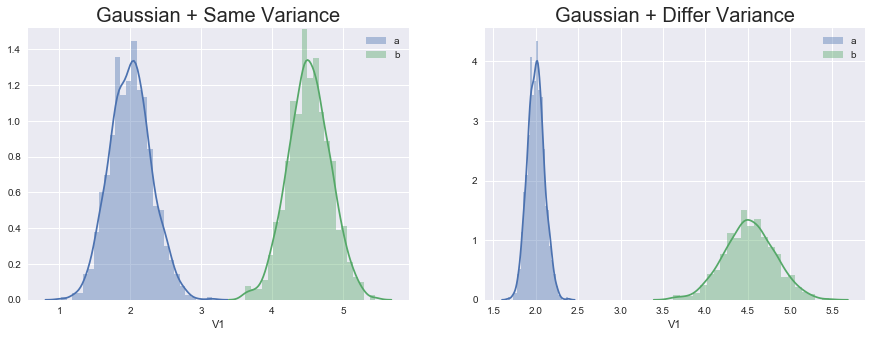

In [191]:
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,2,1)
sns.distplot(df1_1[df1_1.y == 'a'].V1,label='a',ax=ax1)
sns.distplot(df1_1[df1_1.y == 'b'].V1,label='b',ax=ax1)
ax1.set_title('Gaussian + Same Variance',fontsize=20)
ax1.legend()

ax2=fig.add_subplot(1,2,2)
sns.distplot(df1_2[df1_2.y == 'a'].V1,label='a',ax=ax2)
sns.distplot(df1_2[df1_2.y == 'b'].V1,label='b',ax=ax2)
ax2.set_title('Gaussian + Differ Variance',fontsize=20)
ax2.legend()

plt.show()

In [ ]:
### 2 input variable ###

In [192]:
# case1. Gausian + Same Variance  + Feature Dependent
np.random.seed(42)

mean1 = [0,0]
cov1 = [[2,1.5],[1.5,3]]
a1_samescale_dependent,b1_samescale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [7,7]
cov2 = [[2,1.5],[1.5,3]]
a2_samescale_dependent, b2_samescale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_1=pd.DataFrame()
df2_1['V1']=np.append(a1_samescale_dependent, a2_samescale_dependent)
df2_1['V2']=np.append(b1_samescale_dependent, b2_samescale_dependent)

df2_1['y']=np.repeat(['a','b'],[1000,1000])

# case2. Gausian + Same Variance  + Feature Independent
np.random.seed(42)

mean1 = [0,0]
cov1 = [[2,0],[0,3]]
a1_samescale_independent,b1_samescale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [7,7]
cov2 = [[2,0],[0,3]]
a2_samescale_independent, b2_samescale_independent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_2=pd.DataFrame()
df2_2['V1']=np.append(a1_samescale_independent, a2_samescale_independent)
df2_2['V2']=np.append(b1_samescale_independent, b2_samescale_independent)

df2_2['y']=np.repeat(['a','b'],[1000,1000])

# case3. Gausian + Differ Variance  + Feature Dependent
np.random.seed(42)

mean1 = [0,0]
cov1 = [[2,0.5],[0.5,3]]
a1_diffscale_dependent,b1_diffscale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [8,8]
cov2 = [[4,2.5],[2.5,6]]
a2_diffscale_dependent, b2_diffscale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_3=pd.DataFrame()
df2_3['V1']=np.append(a1_diffscale_dependent, a2_diffscale_dependent)
df2_3['V2']=np.append(b1_diffscale_dependent, b2_diffscale_dependent)

df2_3['y']=np.repeat(['a','b'],[1000,1000])

# case4. Gausian + Differ Variance  + Feature Independent
np.random.seed(42)

mean1 = [0,0]
cov1 = [[2,0],[0,3]]
a1_diffscale_independent,b1_diffscale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [8,8]
cov2 = [[4,0],[0,6]]
a2_diffscale_independent, b2_diffscale_independent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_4=pd.DataFrame()
df2_4['V1']=np.append(a1_diffscale_independent, a2_diffscale_independent)
df2_4['V2']=np.append(b1_diffscale_independent, b2_diffscale_independent)

df2_4['y']=np.repeat(['a','b'],[1000,1000])

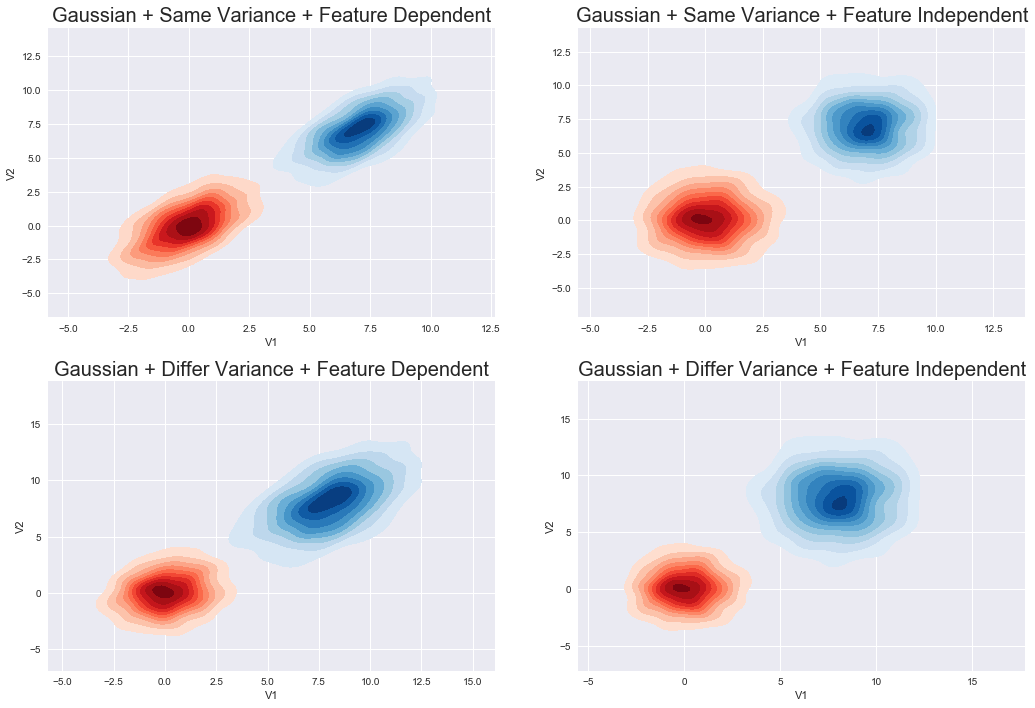

In [193]:
fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,2,1)
sns.kdeplot(df2_1[df2_1.y =='a'].V1, df2_1[df2_1.y =='a'].V2,cmap='Reds', shade=True,shade_lowest=False)
sns.kdeplot(df2_1[df2_1.y =='b'].V1, df2_1[df2_1.y =='b'].V2,cmap='Blues', shade=True,shade_lowest=False)
ax1.set_title('Gaussian + Same Variance + Feature Dependent',fontsize=20)

ax2=fig.add_subplot(2,2,2)
sns.kdeplot(df2_2[df2_2.y =='a'].V1, df2_2[df2_2.y =='a'].V2, cmap='Reds', shade=True,shade_lowest=False)
sns.kdeplot(df2_2[df2_2.y =='b'].V1, df2_2[df2_2.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax2.set_title('Gaussian + Same Variance + Feature Independent',fontsize=20)

ax3=fig.add_subplot(2,2,3)
sns.kdeplot(df2_3[df2_3.y =='a'].V1, df2_3[df2_3.y =='a'].V2, cmap='Reds', shade=True,shade_lowest=False)
sns.kdeplot(df2_3[df2_3.y =='b'].V1, df2_3[df2_3.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax3.set_title('Gaussian + Differ Variance + Feature Dependent',fontsize=20)

ax4=fig.add_subplot(2,2,4)
sns.kdeplot(df2_4[df2_4.y =='a'].V1, df2_4[df2_4.y =='a'].V2, cmap='Reds', shade=True,shade_lowest=False)
sns.kdeplot(df2_4[df2_4.y =='b'].V1, df2_4[df2_4.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax4.set_title('Gaussian + Differ Variance + Feature Independent',fontsize=20)

plt.tight_layout()
plt.show()

In [33]:
### 3 input variable ###

In [194]:
# case1. Gausian + Same Variance  + Feature Dependent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[2,1.5,1],[1.5,3,2],[1,2,4]]
a1_samescale_dependent,b1_samescale_dependent,c1_samescale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [9,9,9]
cov2 = [[2,1.5,1],[1.5,3,2],[1,2,4]]
a2_samescale_dependent, b2_samescale_dependent, c2_samescale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_1=pd.DataFrame()
df3_1['V1']=np.append(a1_samescale_dependent, a2_samescale_dependent)
df3_1['V2']=np.append(b1_samescale_dependent, b2_samescale_dependent)
df3_1['V3']=np.append(c1_samescale_dependent, c2_samescale_dependent)

df3_1['y'] =np.repeat(['a','b'],[1000,1000])


# case2. Gausian + Same Variance  + Feature Independent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[2,0,0],[0,3,0],[0,0,4]]
a1_samescale_independent,b1_samescale_independent,c1_samescale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [7,7,7]
cov2 = [[2,0,0],[0,3,0],[0,0,4]]
a2_samescale_independent, b2_samescale_independent, c2_samescale_independent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_2=pd.DataFrame()
df3_2['V1']=np.append(a1_samescale_independent, a2_samescale_independent)
df3_2['V2']=np.append(b1_samescale_independent, b2_samescale_independent)
df3_2['V3']=np.append(c1_samescale_independent, c2_samescale_independent)

df3_2['y'] =np.repeat(['a','b'],[1000,1000])


# case3. Gausian + Differ Variance  + Feature Dependent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[2,1.5,1],[1.5,6,2],[1,2,4]]
a1_diffscale_dependent,b1_diffscale_dependent,c1_diffscale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [8,8,8]
cov2 = [[1,1.5,1],[1.5,5,2],[1,2,1.5]]
a2_diffscale_dependent, b2_diffscale_dependent, c2_diffscale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_3=pd.DataFrame()
df3_3['V1']=np.append(a1_diffscale_dependent, a2_diffscale_dependent)
df3_3['V2']=np.append(b1_diffscale_dependent, b2_diffscale_dependent)
df3_3['V3']=np.append(c1_diffscale_dependent, c2_diffscale_dependent)

df3_3['y'] =np.repeat(['a','b'],[1000,1000])


# case4. Gausian + Differ Variance  + Feature Independent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[2,0,0],[0,3,0],[0,0,4]]
a1_diffscale_independent,b1_diffscale_independent,c1_diffscale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [9,9,9]
cov2 = [[5.5,0,0],[0,8,0],[0,0,6]]
a2_diffscale_independent, b2_diffscale_independent, c2_diffscale_independent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_4=pd.DataFrame()
df3_4['V1']=np.append(a1_diffscale_independent, a2_diffscale_independent)
df3_4['V2']=np.append(b1_diffscale_independent, b2_diffscale_independent)
df3_4['V3']=np.append(c1_diffscale_independent, c2_diffscale_independent)

df3_4['y'] =np.repeat(['a','b'],[1000,1000])

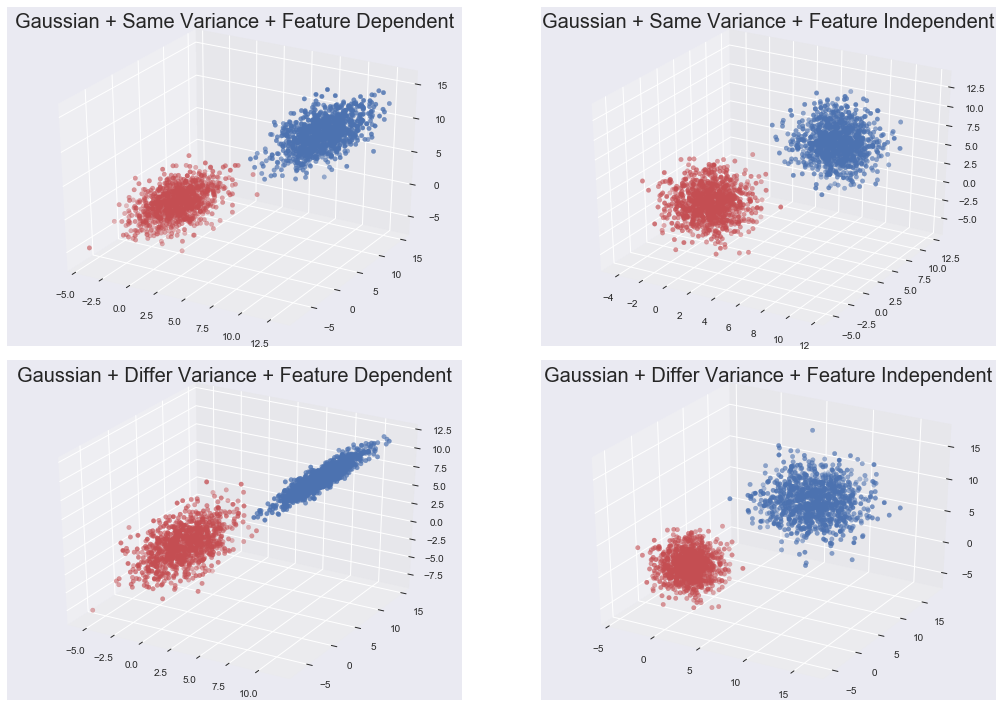

In [195]:
fig=plt.figure(figsize=(15,10))

c_map ={'a':'r', 'b':'b'}

ax1=fig.add_subplot(2,2,1,projection='3d')
ax1.scatter(df3_1.V1, df3_1.V2, df3_1.V3, c=[c_map[_] for _ in df3_1.y])
ax1.set_title('Gaussian + Same Variance + Feature Dependent',fontsize=20)

ax2=fig.add_subplot(2,2,2,projection='3d')
ax2.scatter(df3_2.V1, df3_2.V2, df3_2.V3, c=[c_map[_] for _ in df3_2.y])
ax2.set_title('Gaussian + Same Variance + Feature Independent',fontsize=20)

ax3=fig.add_subplot(2,2,3,projection='3d')
ax3.scatter(df3_3.V1, df3_3.V2, df3_3.V3, c=[c_map[_] for _ in df3_3.y])
ax3.set_title('Gaussian + Differ Variance + Feature Dependent',fontsize=20)

ax4=fig.add_subplot(2,2,4,projection='3d')
ax4.scatter(df3_4.V1, df3_4.V2, df3_4.V3, c=[c_map[_] for _ in df3_4.y])
ax4.set_title('Gaussian + Differ Variance + Feature Independent',fontsize=20)

plt.tight_layout()
plt.show()

# Model Fitting without CV

In [196]:
### 데이터 분할 ###

# 1 input variable

X1_1_train, X1_1_test, y1_1_train, y1_1_test = train_test_split(df1_1.loc[:,['V1']],df1_1.y,test_size=0.3,random_state=21)
X1_2_train, X1_2_test, y1_2_train, y1_2_test = train_test_split(df1_2.loc[:,['V1']],df1_2.y,test_size=0.3,random_state=21)

# 2 input variable
    
X2_1_train, X2_1_test, y2_1_train, y2_1_test = train_test_split(df2_1.loc[:,['V1','V2']],df2_1.y,test_size=0.3,random_state=21)
X2_2_train, X2_2_test, y2_2_train, y2_2_test = train_test_split(df2_2.loc[:,['V1','V2']],df2_2.y,test_size=0.3,random_state=21)
X2_3_train, X2_3_test, y2_3_train, y2_3_test = train_test_split(df2_3.loc[:,['V1','V2']],df2_3.y,test_size=0.3,random_state=21)
X2_4_train, X2_4_test, y2_4_train, y2_4_test = train_test_split(df2_4.loc[:,['V1','V2']],df2_4.y,test_size=0.3,random_state=21)

# 3 input variable

X3_1_train, X3_1_test, y3_1_train, y3_1_test = train_test_split(df3_1.loc[:,['V1','V2','V3']],df3_1.y,test_size=0.3,random_state=21)
X3_2_train, X3_2_test, y3_2_train, y3_2_test = train_test_split(df3_2.loc[:,['V1','V2','V3']],df3_2.y,test_size=0.3,random_state=21)
X3_3_train, X3_3_test, y3_3_train, y3_3_test = train_test_split(df3_3.loc[:,['V1','V2','V3']],df3_3.y,test_size=0.3,random_state=21)
X3_4_train, X3_4_test, y3_4_train, y3_4_test = train_test_split(df3_4.loc[:,['V1','V2','V3']],df3_4.y,test_size=0.3,random_state=21)

In [197]:
def evaluate_withoutCV(X_train,X_test,y_train,y_test):
    # Name of models
    model_name_list=['LDA','QDA','Naive','Logistic']
    
    model1 = LinearDiscriminantAnalysis()
    model2 = QuadraticDiscriminantAnalysis()
    model3 = GaussianNB()
    model4 = LogisticRegression()
    
    # DataFrame for result
    result = pd.DataFrame()
     
    # Train and predict with each model
    accuracy=[]
    coef=[]
        
    for i, model in enumerate([model1,model2,model3,model4]):
        model.fit(X_train,y_train)
        prediction = model.predict(X_test)
        
        accuracy.append(accuracy_score(y_test, prediction))
     
    result['model'] = ['LDA','QDA','Naive','Logistic']
    result['accuracy'] = accuracy
    
    
    return result

## - 1 input variable

In [198]:
##### (case1. Gausian + Same Variance)
result1 = evaluate_withoutCV(X1_1_train,X1_1_test,y1_1_train,y1_1_test)

result1

,model,accuracy
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [199]:
##### (case2. Gausian + Differ Variance)
result2 = evaluate_withoutCV(X1_2_train,X1_2_test,y1_2_train,y1_2_test)

result2

,model,accuracy
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


## - 2 input variable

In [200]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result1 = evaluate_withoutCV(X2_1_train,X2_1_test,y2_1_train,y2_1_test)

result1

,model,accuracy
0,LDA,0.991667
1,QDA,0.991667
2,Naive,0.990000
3,Logistic,0.990000


In [202]:
##### (case2. Gausian + Same Variance  + Feature independent)
result2 = evaluate_withoutCV(X2_2_train,X2_2_test,y2_2_train,y2_2_test)

result2

,model,accuracy
0,LDA,0.996667
1,QDA,0.998333
2,Naive,0.998333
3,Logistic,0.998333


In [201]:
##### (case3. Gausian + Diff Variance  + Feature Dependent)
result3 = evaluate_withoutCV(X2_3_train,X2_3_test,y2_3_train,y2_3_test)

result3

,model,accuracy
0,LDA,0.991667
1,QDA,0.998333
2,Naive,1.000000
3,Logistic,0.998333


In [203]:
##### (case4. Gausian + Diff Variance  + Feature Independent)
result4 = evaluate_withoutCV(X2_4_train,X2_4_test,y2_4_train,y2_4_test)

result4

,model,accuracy
0,LDA,0.996667
1,QDA,0.996667
2,Naive,0.996667
3,Logistic,0.996667


## - 3 input variable

In [204]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result1 = evaluate_withoutCV(X3_1_train,X3_1_test,y3_1_train,y3_1_test)

result1

,model,accuracy
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [205]:
##### (case2. Gausian + Same Variance  + Feature independent)
result2 = evaluate_withoutCV(X3_2_train,X3_2_test,y3_2_train,y3_2_test)

result2

,model,accuracy
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [206]:
##### (case3. Gausian + Diff Variance  + Feature Dependent)
result3 = evaluate_withoutCV(X3_3_train,X3_3_test,y3_3_train,y3_3_test)

result3

,model,accuracy
0,LDA,1.000000
1,QDA,1.000000
2,Naive,0.998333
3,Logistic,0.998333


In [207]:
##### (case4. Gausian + Diff Variance  + Feature Independent)
result4 = evaluate_withoutCV(X3_4_train,X3_4_test,y3_4_train,y3_4_test)

result4

,model,accuracy
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


# Model Fitting with CV

In [28]:
def evaluate_withCV(df):
    # Name of models
    model_name_list=['LDA','QDA','Naive','Logistic']
    
    model1 = LinearDiscriminantAnalysis()
    model2 = QuadraticDiscriminantAnalysis()
    model3 = GaussianNB()
    model4 = LogisticRegression()
    
    # cv
    n_row = len(df)
    np.random.seed(42)
    suffled_index=np.random.permutation(n_row)
    
    treshold1 = int(n_row*0.2)
    treshold2 = int(n_row*0.4)
    treshold3 = int(n_row*0.6)
    treshold4 = int(n_row*0.8)    

    fold1_index = suffled_index[:treshold1]
    fold2_index = suffled_index[treshold1:treshold2]
    fold3_index = suffled_index[treshold2:treshold3]
    fold4_index = suffled_index[treshold3:treshold4]
    fold5_index = suffled_index[treshold4:]    
      
    fold_index=[fold1_index,fold2_index,fold3_index,fold4_index,fold5_index]
    
    # DataFrame for result
    result = pd.DataFrame()
     
    # Train and predict with each model
    accuracy_mean=[]
    coef_matrix = pd.DataFrame(columns=df.columns.tolist()[:-1])        
    
    for i, model in enumerate([model1,model2,model3,model4]):
        for index in fold_index:
            cv_test = df.iloc[index]
            cv_train = df.drop(index)

            model.fit(cv_train.iloc[:,:-1], cv_train.iloc[:,-1])
            prediction=model.predict(cv_test.iloc[:,:-1])

            accuracy=[]

            accuracy.append(accuracy_score(cv_test.iloc[:,-1], prediction))
            try:
                coef_matrix = coef_matrix.append(pd.DataFrame(model.coef_, columns=df.columns.tolist()[:-1]))
            except:
                coef_matrix = coef_matrix.append(pd.DataFrame([[0]*(len(df.columns)-1)],columns=df.columns.tolist()[:-1]))

        accuracy_mean.append(np.mean(accuracy))
        
        
   
     
     
    result['model'] = ['LDA','QDA','Naive','Logistic']
    result['accuracy_mean'] = accuracy_mean
    
    
    return result, coef_matrix

## - 1 input variable

In [208]:
##### (case1. Gausian + Same Variance)
result_accuracy=evaluate_withCV(df1_1)[0]
LDA_coef=evaluate_withCV(df1_1)[1][:5]
Logistic_coef=evaluate_withCV(df1_1)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [209]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.051768
dtype: float64

In [210]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000029
dtype: float64

In [211]:
##### (case2. Gausian + Differ Variance)
result_accuracy=evaluate_withCV(df1_2)[0]
LDA_coef=evaluate_withCV(df1_2)[1][:5]
Logistic_coef=evaluate_withCV(df1_2)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [212]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.406979
dtype: float64

In [213]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000028
dtype: float64

## - 2 input variable

In [214]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df2_1)[0]
LDA_coef=evaluate_withCV(df2_1)[1][:5]
Logistic_coef=evaluate_withCV(df2_1)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.9950
1,QDA,0.9950
2,Naive,0.9975
3,Logistic,0.9950


In [215]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.006115
V2    0.000742
dtype: float64

In [216]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.001799
V2    0.001177
dtype: float64

In [217]:
##### (case2. Gausian + Same Variance  + Feature independent)
result_accuracy=evaluate_withCV(df2_2)[0]
LDA_coef=evaluate_withCV(df2_2)[1][:5]
Logistic_coef=evaluate_withCV(df2_2)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [218]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.001314
V2    0.005253
dtype: float64

In [219]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000649
V2    0.000545
dtype: float64

In [220]:
##### (case3. Gausian + Differ Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df2_3)[0]
LDA_coef=evaluate_withCV(df2_3)[1][:5]
Logistic_coef=evaluate_withCV(df2_3)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.9925
1,QDA,0.9950
2,Naive,0.9925
3,Logistic,0.9975


In [221]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.002198
V2    0.001104
dtype: float64

In [222]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000861
V2    0.000438
dtype: float64

In [223]:
##### (case4. Gausian + Differ Variance  + Feature Independent)
result_accuracy=evaluate_withCV(df2_4)[0]
LDA_coef=evaluate_withCV(df2_4)[1][:5]
Logistic_coef=evaluate_withCV(df2_4)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.9975
1,QDA,0.9975
2,Naive,0.9975
3,Logistic,0.9975


In [224]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.001152
V2    0.003843
dtype: float64

In [225]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000492
V2    0.000393
dtype: float64

## - 3 input variable

In [226]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df3_1)[0]
LDA_coef=evaluate_withCV(df3_1)[1][:5]
Logistic_coef=evaluate_withCV(df3_1)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [227]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.001920
V2    0.005467
V3    0.001558
dtype: float64

In [228]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.001584
V2    0.003618
V3    0.001064
dtype: float64

In [229]:
##### (case2. Gausian + Same Variance  + Feature independent)
result_accuracy=evaluate_withCV(df3_2)[0]
LDA_coef=evaluate_withCV(df3_2)[1][:5]
Logistic_coef=evaluate_withCV(df3_2)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [230]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.005379
V2    0.001496
V3    0.004531
dtype: float64

In [231]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000958
V2    0.001885
V3    0.000176
dtype: float64

In [232]:
##### (case3. Gausian + Differ Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df3_3)[0]
LDA_coef=evaluate_withCV(df3_3)[1][:5]
Logistic_coef=evaluate_withCV(df3_3)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,1.0000
1,QDA,1.0000
2,Naive,0.9925
3,Logistic,1.0000


In [233]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.014588
V2    0.000870
V3    0.001869
dtype: float64

In [234]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.001415
V2    0.000571
V3    0.002840
dtype: float64

In [235]:
##### (case4. Gausian + Differ Variance  + Feature Independent)
result_accuracy=evaluate_withCV(df3_4)[0]
LDA_coef=evaluate_withCV(df3_4)[1][:5]
Logistic_coef=evaluate_withCV(df3_4)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,1.0
1,QDA,1.0
2,Naive,1.0
3,Logistic,1.0


In [236]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.002537
V2    0.002537
V3    0.006461
dtype: float64

In [237]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000358
V2    0.001297
V3    0.000154
dtype: float64

well seperatable한 data set의 경우, 모든 model들이 성능이 좋아서 비교하기 힘들다고 생각합니다.

# 2. Not well seperatable

# 데이터 구성하기

In [445]:
### 1 input variable ###

In [238]:
# case1. Gausian + Same Variance
np.random.seed(42)

a_samescale = np.random.normal(loc=2, scale=0.3,size=1000)
b_samescale = np.random.normal(loc=2.4, scale=0.3,size=1000)

df1_1=pd.DataFrame()
df1_1['V1']=np.append(a_samescale, b_samescale)

df1_1['y']=np.repeat(['a','b'],[1000,1000])

# case2. Gausian + Differ Variance
np.random.seed(42)

a_diffscale = np.random.normal(loc=2, scale=1,size=1000)
b_diffscale = np.random.normal(loc=7, scale=5,size=1000)

df1_2=pd.DataFrame()
df1_2['V1']=np.append(a_diffscale, b_diffscale)

df1_2['y']=np.repeat(['a','b'],[1000,1000])

C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


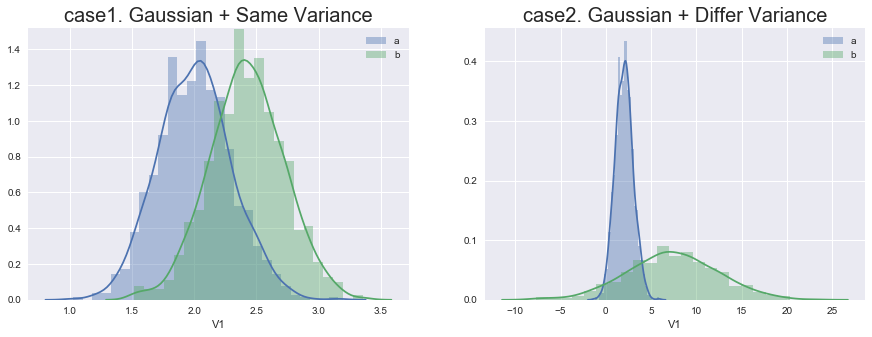

In [239]:
fig=plt.figure(figsize=(15,5))

ax1=fig.add_subplot(1,2,1)
sns.distplot(df1_1[df1_1.y == 'a'].V1,label='a',ax=ax1)
sns.distplot(df1_1[df1_1.y == 'b'].V1,label='b',ax=ax1)
ax1.set_title('case1. Gaussian + Same Variance',fontsize=20)
ax1.legend()

ax2=fig.add_subplot(1,2,2)
sns.distplot(df1_2[df1_2.y == 'a'].V1,label='a',ax=ax2)
sns.distplot(df1_2[df1_2.y == 'b'].V1,label='b',ax=ax2)
ax2.set_title('case2. Gaussian + Differ Variance',fontsize=20)
ax2.legend()

plt.show()

In [486]:
### 2 input variable ###

In [240]:
# case1. Gausian + Same Variance  + Feature Dependent
np.random.seed(42)

mean1 = [1.2,2]
cov1 = [[4,4],[4,6]]
a1_samescale_dependent,b1_samescale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [1.7,0]
cov2 = [[4,4],[4,6]]
a2_samescale_dependent, b2_samescale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_1=pd.DataFrame()
df2_1['V1']=np.append(a1_samescale_dependent, a2_samescale_dependent)
df2_1['V2']=np.append(b1_samescale_dependent, b2_samescale_dependent)

df2_1['y']=np.repeat(['a','b'],[1000,1000])

# case2. Gausian + Same Variance  + Feature Independent
np.random.seed(18)

mean1 = [1.2,2]
cov1 = [[4,0],[0,6]]
a1_samescale_independent,b1_samescale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [2.5,3]
cov2 = [[4,0],[0,6]]
a2_samescale_independent,b2_samescale_independent = np.random.multivariate_normal(mean2, cov2,1000).T


df2_2=pd.DataFrame()
df2_2['V1']=np.append(a1_samescale_independent, a2_samescale_independent)
df2_2['V2']=np.append(b1_samescale_independent, b2_samescale_independent)

df2_2['y']=np.repeat(['a','b'],[1000,1000])

# case3. Gausian + Differ Variance  + Feature Dependent
np.random.seed(42)

mean1 = [2,-1]
cov1 = [[2,4],[6,3]]
a1_diffscale_dependent,b1_diffscale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [1,0]
cov2 = [[7,4],[6,4]]
a2_diffscale_dependent, b2_diffscale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_3=pd.DataFrame()
df2_3['V1']=np.append(a1_diffscale_dependent, a2_diffscale_dependent)
df2_3['V2']=np.append(b1_diffscale_dependent, b2_diffscale_dependent)

df2_3['y']=np.repeat(['a','b'],[1000,1000])

# case4. Gausian + Differ Variance  + Feature Independent
np.random.seed(42)

mean1 = [1,2.8]
cov1 = [[6,0],[0,4.5]]
a1_diffscale_independent,b1_diffscale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [3,4.2]
cov2 = [[2,0],[0,2.5]]
a2_diffscale_independent, b2_diffscale_independent = np.random.multivariate_normal(mean2,cov2,1000).T


df2_4=pd.DataFrame()
df2_4['V1']=np.append(a1_diffscale_independent, a2_diffscale_independent)
df2_4['V2']=np.append(b1_diffscale_independent, b2_diffscale_independent)

df2_4['y']=np.repeat(['a','b'],[1000,1000])

C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:42: RuntimeWarning: covariance is not positive-semidefinite.
C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: covariance is not positive-semidefinite.


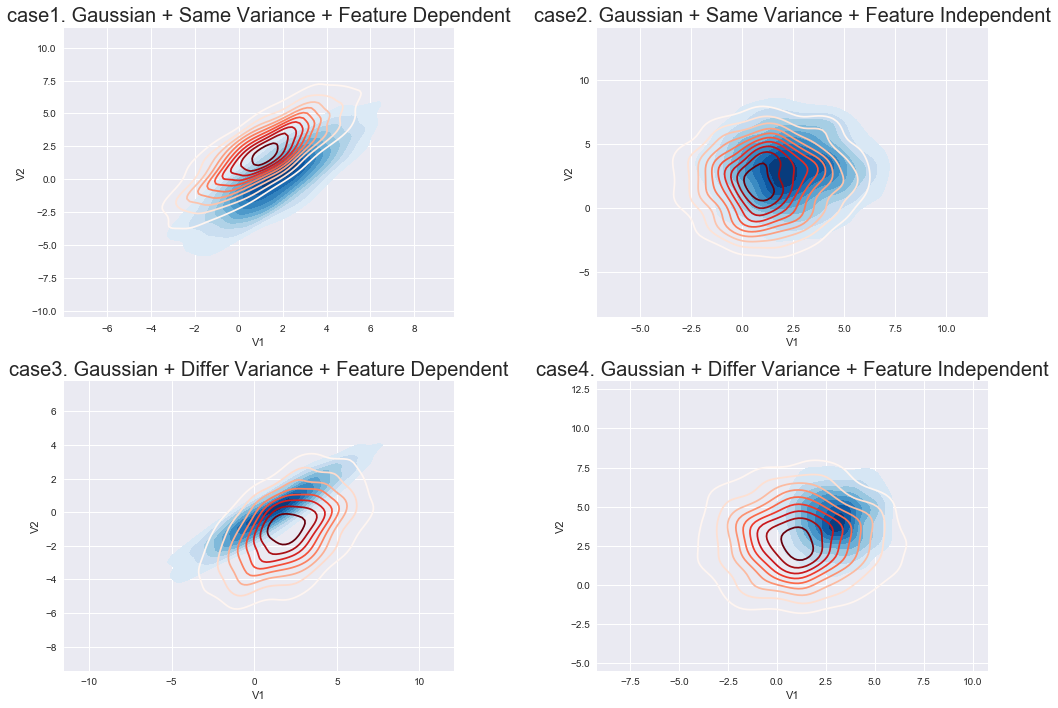

In [241]:
fig=plt.figure(figsize=(15,10))

ax1=fig.add_subplot(2,2,1)
sns.kdeplot(df2_1[df2_1.y =='a'].V1, df2_1[df2_1.y =='a'].V2,cmap='Reds')
sns.kdeplot(df2_1[df2_1.y =='b'].V1, df2_1[df2_1.y =='b'].V2,cmap='Blues', shade=True,shade_lowest=False)
ax1.set_title('case1. Gaussian + Same Variance + Feature Dependent',fontsize=20)

ax2=fig.add_subplot(2,2,2)
sns.kdeplot(df2_2[df2_2.y =='a'].V1, df2_2[df2_2.y =='a'].V2, cmap='Reds')
sns.kdeplot(df2_2[df2_2.y =='b'].V1, df2_2[df2_2.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax2.set_title('case2. Gaussian + Same Variance + Feature Independent',fontsize=20)

ax3=fig.add_subplot(2,2,3)
sns.kdeplot(df2_3[df2_3.y =='a'].V1, df2_3[df2_3.y =='a'].V2, cmap='Reds')
sns.kdeplot(df2_3[df2_3.y =='b'].V1, df2_3[df2_3.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax3.set_title('case3. Gaussian + Differ Variance + Feature Dependent',fontsize=20)

ax4=fig.add_subplot(2,2,4)
sns.kdeplot(df2_4[df2_4.y =='a'].V1, df2_4[df2_4.y =='a'].V2, cmap='Reds')
sns.kdeplot(df2_4[df2_4.y =='b'].V1, df2_4[df2_4.y =='b'].V2, cmap='Blues', shade=True,shade_lowest=False)
ax4.set_title('case4. Gaussian + Differ Variance + Feature Independent',fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
### 3input variable ###

In [242]:
# case1. Gausian + Same Variance  + Feature Dependent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[4,3,5],[3,5,6],[5,6,3]]
a1_samescale_dependent,b1_samescale_dependent,c1_samescale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [4,4,4]
cov2 = [[4,3,5],[3,5,6],[5,6,3]]
a2_samescale_dependent, b2_samescale_dependent, c2_samescale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_1=pd.DataFrame()
df3_1['V1']=np.append(a1_samescale_dependent, a2_samescale_dependent)
df3_1['V2']=np.append(b1_samescale_dependent, b2_samescale_dependent)
df3_1['V3']=np.append(c1_samescale_dependent, c2_samescale_dependent)

df3_1['y'] =np.repeat(['a','b'],[1000,1000])


# case2. Gausian + Same Variance  + Feature Independent
np.random.seed(42)

mean1 = [0,0,0]
cov1 = [[4,0,0],[0,5,0],[0,0,3.7]]
a1_samescale_independent,b1_samescale_independent,c1_samescale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [2,2.5,1.7]
cov2 = [[4,0,0],[0,5,0],[0,0,3.7]]
a2_samescale_independent, b2_samescale_independent, c2_samescale_independent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_2=pd.DataFrame()
df3_2['V1']=np.append(a1_samescale_independent, a2_samescale_independent)
df3_2['V2']=np.append(b1_samescale_independent, b2_samescale_independent)
df3_2['V3']=np.append(c1_samescale_independent, c2_samescale_independent)

df3_2['y'] =np.repeat(['a','b'],[1000,1000])


# case3. Gausian + Differ Variance  + Feature Dependent
np.random.seed(42)

mean1 = [2.5,1,3]
cov1 = [[2,4.5,6],[4.5,6,5],[6,5,4]]
a1_diffscale_dependent,b1_diffscale_dependent,c1_diffscale_dependent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [4,5,3]
cov2 = [[7,1.5,1],[1.5,2.6,2],[1,2,1.2]]
a2_diffscale_dependent, b2_diffscale_dependent, c2_diffscale_dependent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_3=pd.DataFrame()
df3_3['V1']=np.append(a1_diffscale_dependent, a2_diffscale_dependent)
df3_3['V2']=np.append(b1_diffscale_dependent, b2_diffscale_dependent)
df3_3['V3']=np.append(c1_diffscale_dependent, c2_diffscale_dependent)

df3_3['y'] =np.repeat(['a','b'],[1000,1000])


# case4. Gausian + Differ Variance  + Feature Independent
np.random.seed(42)

mean1 = [2,1.5,3]
cov1 = [[2,0,0],[0,1.5,0],[0,0,3]]
a1_diffscale_independent,b1_diffscale_independent,c1_diffscale_independent = np.random.multivariate_normal(mean1, cov1, 1000).T

mean2 = [0,5.2,3.6]
cov2 = [[5.5,0,0],[0,8,0],[0,0,6]]
a2_diffscale_independent, b2_diffscale_independent, c2_diffscale_independent = np.random.multivariate_normal(mean2,cov2,1000).T

df3_4=pd.DataFrame()
df3_4['V1']=np.append(a1_diffscale_independent, a2_diffscale_independent)
df3_4['V2']=np.append(b1_diffscale_independent, b2_diffscale_independent)
df3_4['V3']=np.append(c1_diffscale_independent, c2_diffscale_independent)

df3_4['y'] =np.repeat(['a','b'],[1000,1000])

C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  
C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: covariance is not positive-semidefinite.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: covariance is not positive-semidefinite.
C:\Users\YoungJun\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:48: RuntimeWarning: covariance is not positive-semidefinite.


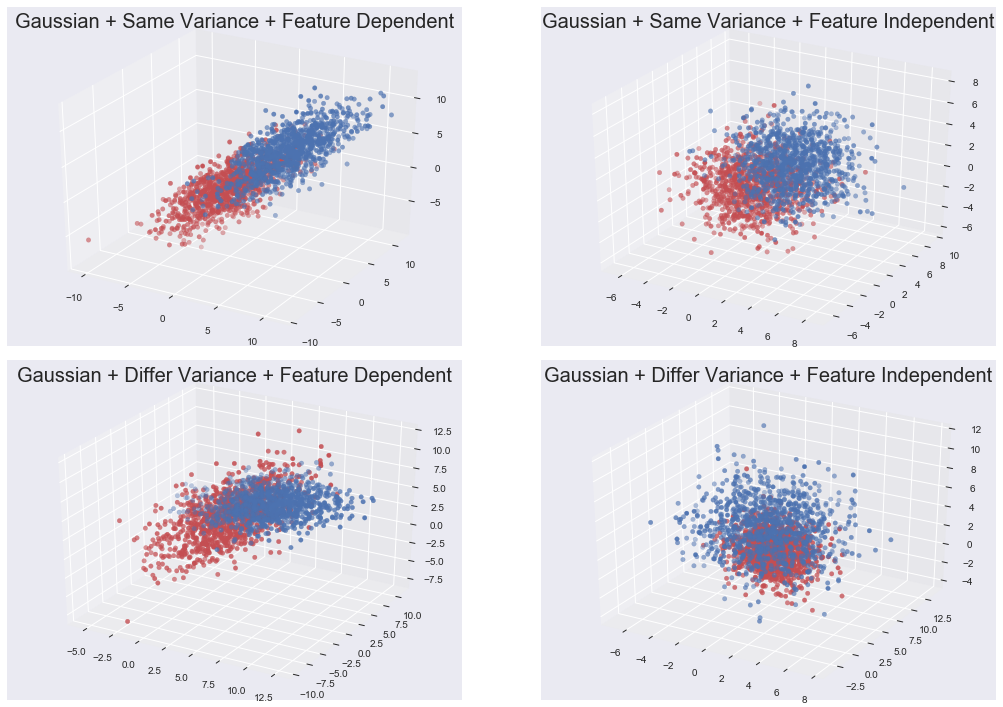

In [243]:
fig=plt.figure(figsize=(15,10))

c_map ={'a':'r', 'b':'b'}

ax1=fig.add_subplot(2,2,1,projection='3d')
ax1.scatter(df3_1.V1, df3_1.V2, df3_1.V3, c=[c_map[_] for _ in df3_1.y])
ax1.set_title('Gaussian + Same Variance + Feature Dependent',fontsize=20)

ax2=fig.add_subplot(2,2,2,projection='3d')
ax2.scatter(df3_2.V1, df3_2.V2, df3_2.V3, c=[c_map[_] for _ in df3_2.y])
ax2.set_title('Gaussian + Same Variance + Feature Independent',fontsize=20)

ax3=fig.add_subplot(2,2,3,projection='3d')
ax3.scatter(df3_3.V1, df3_3.V2, df3_3.V3, c=[c_map[_] for _ in df3_3.y])
ax3.set_title('Gaussian + Differ Variance + Feature Dependent',fontsize=20)

ax4=fig.add_subplot(2,2,4,projection='3d')
ax4.scatter(df3_4.V1, df3_4.V2, df3_4.V3, c=[c_map[_] for _ in df3_4.y])
ax4.set_title('Gaussian + Differ Variance + Feature Independent',fontsize=20)

plt.tight_layout()
plt.show()

# Model Fitting without CV

In [244]:
### 데이터 분할 ###

# 1 input variable

X1_1_train, X1_1_test, y1_1_train, y1_1_test = train_test_split(df1_1.loc[:,['V1']],df1_1.y,test_size=0.3,random_state=21)
X1_2_train, X1_2_test, y1_2_train, y1_2_test = train_test_split(df1_2.loc[:,['V1']],df1_2.y,test_size=0.3,random_state=21)

# 2 input variable
    
X2_1_train, X2_1_test, y2_1_train, y2_1_test = train_test_split(df2_1.loc[:,['V1','V2']],df2_1.y,test_size=0.3,random_state=21)
X2_2_train, X2_2_test, y2_2_train, y2_2_test = train_test_split(df2_2.loc[:,['V1','V2']],df2_2.y,test_size=0.3,random_state=21)
X2_3_train, X2_3_test, y2_3_train, y2_3_test = train_test_split(df2_3.loc[:,['V1','V2']],df2_3.y,test_size=0.3,random_state=21)
X2_4_train, X2_4_test, y2_4_train, y2_4_test = train_test_split(df2_4.loc[:,['V1','V2']],df2_4.y,test_size=0.3,random_state=21)

# 3 input variable

X3_1_train, X3_1_test, y3_1_train, y3_1_test = train_test_split(df3_1.loc[:,['V1','V2','V3']],df3_1.y,test_size=0.3,random_state=21)
X3_2_train, X3_2_test, y3_2_train, y3_2_test = train_test_split(df3_2.loc[:,['V1','V2','V3']],df3_2.y,test_size=0.3,random_state=21)
X3_3_train, X3_3_test, y3_3_train, y3_3_test = train_test_split(df3_3.loc[:,['V1','V2','V3']],df3_3.y,test_size=0.3,random_state=21)
X3_4_train, X3_4_test, y3_4_train, y3_4_test = train_test_split(df3_4.loc[:,['V1','V2','V3']],df3_4.y,test_size=0.3,random_state=21)

## - 1 input variable

In [245]:
##### (case1. Gausian + Same Variance)
result1 = evaluate_withoutCV(X1_1_train,X1_1_test,y1_1_train,y1_1_test)

result1

,model,accuracy
0,LDA,0.781667
1,QDA,0.781667
2,Naive,0.781667
3,Logistic,0.785000


In [246]:
##### (case2. Gausian + Differ Variance)
result2 = evaluate_withoutCV(X1_2_train,X1_2_test,y1_2_train,y1_2_test)

result2

,model,accuracy
0,LDA,0.866667
1,QDA,0.893333
2,Naive,0.893333
3,Logistic,0.878333


## - 2 input variable

In [247]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result1 = evaluate_withoutCV(X2_1_train,X2_1_test,y2_1_train,y2_1_test)

result1

,model,accuracy
0,LDA,0.806667
1,QDA,0.808333
2,Naive,0.738333
3,Logistic,0.806667


In [248]:
##### (case2. Gausian + Same Variance  + Feature independent)
result2 = evaluate_withoutCV(X2_2_train,X2_2_test,y2_2_train,y2_2_test)

result2

,model,accuracy
0,LDA,0.626667
1,QDA,0.635000
2,Naive,0.633333
3,Logistic,0.626667


In [249]:
##### (case3. Gausian + Diff Variance  + Feature Dependent)
result3 = evaluate_withoutCV(X2_3_train,X2_3_test,y2_3_train,y2_3_test)

result3

,model,accuracy
0,LDA,0.775000
1,QDA,0.796667
2,Naive,0.746667
3,Logistic,0.761667


In [250]:
##### (case4. Gausian + Diff Variance  + Feature Independent)
result4 = evaluate_withoutCV(X2_4_train,X2_4_test,y2_4_train,y2_4_test)

result4

,model,accuracy
0,LDA,0.716667
1,QDA,0.748333
2,Naive,0.748333
3,Logistic,0.713333


## - 3 input variable

In [251]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result1 = evaluate_withoutCV(X3_1_train,X3_1_test,y3_1_train,y3_1_test)

result1

,model,accuracy
0,LDA,0.876667
1,QDA,0.880000
2,Naive,0.870000
3,Logistic,0.873333


In [252]:
##### (case2. Gausian + Same Variance  + Feature independent)
result2 = evaluate_withoutCV(X3_2_train,X3_2_test,y3_2_train,y3_2_test)

result2

,model,accuracy
0,LDA,0.781667
1,QDA,0.785000
2,Naive,0.783333
3,Logistic,0.781667


In [253]:
##### (case3. Gausian + Diff Variance  + Feature Dependent)
result3 = evaluate_withoutCV(X3_3_train,X3_3_test,y3_3_train,y3_3_test)

result3

,model,accuracy
0,LDA,0.966667
1,QDA,0.973333
2,Naive,0.885000
3,Logistic,0.970000


In [254]:
##### (case4. Gausian + Diff Variance  + Feature Independent)
result4 = evaluate_withoutCV(X3_4_train,X3_4_test,y3_4_train,y3_4_test)

result4

,model,accuracy
0,LDA,0.848333
1,QDA,0.886667
2,Naive,0.885000
3,Logistic,0.833333


# Model Fitting with CV

## - 1 input variable

In [255]:
##### (case1. Gausian + Same Variance)
result_accuracy=evaluate_withCV(df1_1)[0]
LDA_coef=evaluate_withCV(df1_1)[1][:5]
Logistic_coef=evaluate_withCV(df1_1)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.7650
1,QDA,0.7650
2,Naive,0.7650
3,Logistic,0.7625


In [256]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.01362
dtype: float64

In [257]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.003763
dtype: float64

In [258]:
##### (case2. Gausian + Differ Variance)
result_accuracy=evaluate_withCV(df1_2)[0]
LDA_coef=evaluate_withCV(df1_2)[1][:5]
Logistic_coef=evaluate_withCV(df1_2)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.8375
1,QDA,0.8800
2,Naive,0.8800
3,Logistic,0.8550


In [259]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.00006
dtype: float64

In [260]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000388
dtype: float64

## - 2 input variable

In [261]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df2_1)[0]
LDA_coef=evaluate_withCV(df2_1)[1][:5]
Logistic_coef=evaluate_withCV(df2_1)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.8450
1,QDA,0.8450
2,Naive,0.7475
3,Logistic,0.8400


In [262]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.000756
V2    0.000353
dtype: float64

In [263]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.001372
V2    0.000826
dtype: float64

In [264]:
##### (case2. Gausian + Same Variance  + Feature independent)
result_accuracy=evaluate_withCV(df2_2)[0]
LDA_coef=evaluate_withCV(df2_2)[1][:5]
Logistic_coef=evaluate_withCV(df2_2)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.6200
1,QDA,0.6175
2,Naive,0.6125
3,Logistic,0.6225


In [265]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.000310
V2    0.000126
dtype: float64

In [266]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000295
V2    0.000113
dtype: float64

In [267]:
##### (case3. Gausian + Differ Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df2_3)[0]
LDA_coef=evaluate_withCV(df2_3)[1][:5]
Logistic_coef=evaluate_withCV(df2_3)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.7650
1,QDA,0.7950
2,Naive,0.7750
3,Logistic,0.7725


In [268]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.000113
V2    0.000583
dtype: float64

In [269]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000234
V2    0.000857
dtype: float64

In [270]:
##### (case4. Gausian + Differ Variance  + Feature Independent)
result_accuracy=evaluate_withCV(df2_4)[0]
LDA_coef=evaluate_withCV(df2_4)[1][:5]
Logistic_coef=evaluate_withCV(df2_4)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.7225
1,QDA,0.7575
2,Naive,0.7575
3,Logistic,0.7225


In [271]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.000134
V2    0.000081
dtype: float64

In [272]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000183
V2    0.000070
dtype: float64

## - 3 input variable

In [273]:
##### (case1. Gausian + Same Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df3_1)[0]
LDA_coef=evaluate_withCV(df3_1)[1][:5]
Logistic_coef=evaluate_withCV(df3_1)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.8325
1,QDA,0.8325
2,Naive,0.8375
3,Logistic,0.8325


In [274]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.000238
V2    0.000087
V3    0.000311
dtype: float64

In [275]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000497
V2    0.000165
V3    0.000510
dtype: float64

In [276]:
##### (case2. Gausian + Same Variance  + Feature independent)
result_accuracy=evaluate_withCV(df3_2)[0]
LDA_coef=evaluate_withCV(df3_2)[1][:5]
Logistic_coef=evaluate_withCV(df3_2)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.8125
1,QDA,0.8100
2,Naive,0.8075
3,Logistic,0.8100


In [277]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.000115
V2    0.000369
V3    0.000577
dtype: float64

In [278]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000160
V2    0.000561
V3    0.000528
dtype: float64

In [279]:
##### (case3. Gausian + Differ Variance  + Feature Dependent)
result_accuracy=evaluate_withCV(df3_3)[0]
LDA_coef=evaluate_withCV(df3_3)[1][:5]
Logistic_coef=evaluate_withCV(df3_3)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.9625
1,QDA,0.9700
2,Naive,0.8725
3,Logistic,0.9600


In [280]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.000057
V2    0.003963
V3    0.001899
dtype: float64

In [281]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.001372
V2    0.008838
V3    0.002671
dtype: float64

In [282]:
##### (case4. Gausian + Differ Variance  + Feature Independent)
result_accuracy=evaluate_withCV(df3_4)[0]
LDA_coef=evaluate_withCV(df3_4)[1][:5]
Logistic_coef=evaluate_withCV(df3_4)[1][15:]
result_accuracy

,model,accuracy_mean
0,LDA,0.8300
1,QDA,0.8775
2,Naive,0.8800
3,Logistic,0.8375


In [283]:
LDA_coef.index=['cv1','cv2','cv3','cv4','cv5']
LDA_coef.var(axis=0)

V1    0.000415
V2    0.000400
V3    0.000394
dtype: float64

In [284]:
Logistic_coef.index=['cv1','cv2','cv3','cv4','cv5']
Logistic_coef.var(axis=0)

V1    0.000646
V2    0.000603
V3    0.000477
dtype: float64

# Not well seperatable 요약

# 1 input variable

## - case1: 등분산

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-s6z2" rowspan="2"></th>
    <th class="tg-hgcj" rowspan="2">Model</th>
    <th class="tg-hgcj" rowspan="2">가정</th>
    <th class="tg-hgcj" colspan="2">Without CV</th>
    <th class="tg-hgcj" colspan="2">With CV</th>
  </tr>
  <tr>
    <td class="tg-hgcj">accuracy</td>
    <td class="tg-hgcj">V1</td>
    <td class="tg-hgcj">accuracy_mean</td>
    <td class="tg-amwm">V1_variance</td>
  </tr>
  <tr>
    <td class="tg-hgcj" rowspan="4">case1</td>
    <td class="tg-s6z2">LDA</td>
    <td class="tg-s6z2">만족</td>
    <td class="tg-s6z2">0.781667</td>
    <td class="tg-s6z2">4.525675</td>
    <td class="tg-s6z2">0.765</td>
    <td class="tg-baqh">0.01362</td>
  </tr>
  <tr>
    <td class="tg-s6z2">QDA</td>
    <td class="tg-s6z2">이분산 가정 깨짐</td>
    <td class="tg-s6z2">0.781667</td>
    <td class="tg-s6z2">-</td>
    <td class="tg-s6z2">0.765</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-s6z2">Naive</td>
    <td class="tg-s6z2">만족</td>
    <td class="tg-s6z2">0.781667</td>
    <td class="tg-s6z2">-</td>
    <td class="tg-s6z2">0.765</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-baqh">Logistic</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">0.785000</td>
    <td class="tg-baqh">0.479195</td>
    <td class="tg-baqh">0.7625</td>
    <td class="tg-baqh">0.003763</td>
  </tr>
</table>

가정 깨졌는지 안깨졌는지 상관 없이 3 model 비슷한 accuracy

## - case2: 이분산

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-s6z2" rowspan="2"></th>
    <th class="tg-hgcj" rowspan="2">Model</th>
    <th class="tg-hgcj" rowspan="2">가정</th>
    <th class="tg-hgcj" colspan="2">Without CV</th>
    <th class="tg-hgcj" colspan="2">With CV</th>
  </tr>
  <tr>
    <td class="tg-hgcj">accuracy</td>
    <td class="tg-hgcj">V1</td>
    <td class="tg-hgcj">accuracy_mean</td>
    <td class="tg-amwm">V1_variance</td>
  </tr>
  <tr>
    <td class="tg-hgcj" rowspan="4">case2</td>
    <td class="tg-s6z2">LDA</td>
    <td class="tg-s6z2">등분산 가정 깨짐</td>
    <td class="tg-s6z2">0.866667</td>
    <td class="tg-s6z2">0.386234</td>
    <td class="tg-s6z2">0.8375</td>
    <td class="tg-baqh">0.00006</td>
  </tr>
  <tr>
    <td class="tg-s6z2">QDA</td>
    <td class="tg-s6z2">만족</td>
    <td class="tg-s6z2">0.893333</td>
    <td class="tg-s6z2">-</td>
    <td class="tg-s6z2">0.8800</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-s6z2">Naive</td>
    <td class="tg-s6z2">등분산 가정 깨짐</td>
    <td class="tg-s6z2">0.893333</td>
    <td class="tg-s6z2">-</td>
    <td class="tg-s6z2">0.8800</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-baqh">Logistic</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">0.878333</td>
    <td class="tg-baqh">0.479195</td>
    <td class="tg-baqh">0.8550</td>
    <td class="tg-baqh">0.000388</td>
  </tr>
</table>

등분산 가정이 깨진 LDA의 경우 QDA보다 withoutcCV, withCV 모두에서 accuracy가 약 0.03, 0.05정도 낮게 나타났다.

# 2,3 input variable

## -case1: 등분산 + Feature Dependent

2 input
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-s6z2" rowspan="2"></th>
    <th class="tg-hgcj" rowspan="2">Model</th>
    <th class="tg-hgcj" rowspan="2">가정</th>
    <th class="tg-hgcj" colspan="2">Without CV</th>
    <th class="tg-hgcj" colspan="3">With CV</th>
  </tr>
  <tr>
    <td class="tg-hgcj" colspan="2">accuracy</td>
    <td class="tg-hgcj">accuracy_mean</td>
    <td class="tg-amwm">V1_variance</td>
    <td class="tg-amwm">V2_variance</td>
  </tr>
  <tr>
    <td class="tg-hgcj" rowspan="4">case1</td>
    <td class="tg-s6z2">LDA</td>
    <td class="tg-s6z2">만족</td>
    <td class="tg-s6z2" colspan="2">0.806667</td>
    <td class="tg-s6z2">0.8450</td>
    <td class="tg-baqh">0.000756</td>
    <td class="tg-baqh">0.000353</td>
  </tr>
  <tr>
    <td class="tg-s6z2">QDA</td>
    <td class="tg-s6z2">이분산 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.808333</td>
    <td class="tg-s6z2">0.8450</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-s6z2">Naive</td>
    <td class="tg-s6z2">independent 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.738333</td>
    <td class="tg-s6z2">0.7475</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-baqh">Logistic</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">0.806667</td>
    <td class="tg-baqh">0.8400</td>
    <td class="tg-baqh">0.001372</td>
    <td class="tg-baqh">0.000826</td>
  </tr>
</table>

3 input
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-s6z2" rowspan="2"></th>
    <th class="tg-hgcj" rowspan="2">Model</th>
    <th class="tg-hgcj" rowspan="2">가정</th>
    <th class="tg-hgcj" colspan="2">Without CV</th>
    <th class="tg-hgcj" colspan="4">With CV</th>
  </tr>
  <tr>
    <td class="tg-hgcj" colspan="2">accuracy</td>
    <td class="tg-hgcj">accuracy_mean</td>
    <td class="tg-amwm">V1_variance</td>
    <td class="tg-amwm">V2_variance</td>
    <td class="tg-amwm">V3_variance</td>
  </tr>
  <tr>
    <td class="tg-hgcj" rowspan="4">case1</td>
    <td class="tg-s6z2">LDA</td>
    <td class="tg-s6z2">만족</td>
    <td class="tg-s6z2" colspan="2">0.876667</td>
    <td class="tg-s6z2">0.8325</td>
    <td class="tg-baqh">0.000238</td>
    <td class="tg-baqh">0.000087</td>
    <td class="tg-baqh">0.00031</td>
  </tr>
  <tr>
    <td class="tg-s6z2">QDA</td>
    <td class="tg-s6z2">이분산 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.880000</td>
    <td class="tg-s6z2">0.8325</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-s6z2">Naive</td>
    <td class="tg-s6z2">independent 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.870000</td>
    <td class="tg-s6z2">0.8375</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-baqh">Logistic</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">0.873333</td>
    <td class="tg-baqh">0.8325</td>
    <td class="tg-baqh">0.000497</td>
    <td class="tg-baqh">0.0008260.000165</td>
    <td class="tg-baqh">0.000510</td>
  </tr>
</table>

2input variable에서 independent가정이 깨진 Naive model의 경우 다른 model들에 비해 accuracy가 0.1정도 낮게 나타났다. 하지만 3 input variable에서는 3 model간에 큰 차이가 없었다.

## -case2: 등분산 + Feature Independent

2 input
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-s6z2" rowspan="2"></th>
    <th class="tg-hgcj" rowspan="2">Model</th>
    <th class="tg-hgcj" rowspan="2">가정</th>
    <th class="tg-hgcj" colspan="2">Without CV</th>
    <th class="tg-hgcj" colspan="4">With CV</th>
  </tr>
  <tr>
    <td class="tg-hgcj" colspan="2">accuracy</td>
    <td class="tg-hgcj">accuracy_mean</td>
    <td class="tg-amwm">V1_variance</td>
    <td class="tg-amwm" colspan="2">V2_variance</td>
  </tr>
  <tr>
    <td class="tg-hgcj" rowspan="4">case2</td>
    <td class="tg-s6z2">LDA</td>
    <td class="tg-s6z2">dependent 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.626667</td>
    <td class="tg-s6z2">0.6200</td>
    <td class="tg-baqh">0.000310</td>
    <td class="tg-baqh" colspan="2">0.000126</td>
  </tr>
  <tr>
    <td class="tg-s6z2">QDA</td>
    <td class="tg-s6z2">모든 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.635000</td>
    <td class="tg-s6z2">0.6175</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">-</td>
  </tr>
  <tr>
    <td class="tg-s6z2">Naive</td>
    <td class="tg-s6z2">만족</td>
    <td class="tg-s6z2" colspan="2">0.633333</td>
    <td class="tg-s6z2">0.6125</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">-</td>
  </tr>
  <tr>
    <td class="tg-baqh">Logistic</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">0.62667</td>
    <td class="tg-baqh">0.6225</td>
    <td class="tg-baqh">0.000295</td>
    <td class="tg-baqh" colspan="2">0.000113</td>
  </tr>
</table>

3 input
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-s6z2" rowspan="2"></th>
    <th class="tg-hgcj" rowspan="2">Model</th>
    <th class="tg-hgcj" rowspan="2">가정</th>
    <th class="tg-hgcj" colspan="2">Without CV</th>
    <th class="tg-hgcj" colspan="4">With CV</th>
  </tr>
  <tr>
    <td class="tg-hgcj" colspan="2">accuracy</td>
    <td class="tg-hgcj">accuracy_mean</td>
    <td class="tg-amwm">V1_variance</td>
    <td class="tg-amwm">V2_variance</td>
    <td class="tg-amwm">V3_variance</td>
  </tr>
  <tr>
    <td class="tg-hgcj" rowspan="4">case2</td>
    <td class="tg-s6z2">LDA</td>
    <td class="tg-s6z2">dependent 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.781667</td>
    <td class="tg-s6z2">0.8125</td>
    <td class="tg-baqh">0.000115</td>
    <td class="tg-baqh">0.000369</td>
    <td class="tg-baqh">0.000577</td>
  </tr>
  <tr>
    <td class="tg-s6z2">QDA</td>
    <td class="tg-s6z2">모든 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.785000</td>
    <td class="tg-s6z2">0.8100</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-s6z2">Naive</td>
    <td class="tg-s6z2">만족</td>
    <td class="tg-s6z2" colspan="2">0.783333</td>
    <td class="tg-s6z2">0.8075</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-baqh">Logistic</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">0.781667</td>
    <td class="tg-baqh">0.8100</td>
    <td class="tg-baqh">0.000160</td>
    <td class="tg-baqh">0.000561</td>
    <td class="tg-baqh">0.000528</td>
  </tr>
</table>

model간에 큰 차이가 없어보인다.

## -case3: 이분산 + Feature Dependent

2 input
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-s6z2" rowspan="2"></th>
    <th class="tg-hgcj" rowspan="2">Model</th>
    <th class="tg-hgcj" rowspan="2">가정</th>
    <th class="tg-hgcj" colspan="2">Without CV</th>
    <th class="tg-hgcj" colspan="4">With CV</th>
  </tr>
  <tr>
    <td class="tg-hgcj" colspan="2">accuracy</td>
    <td class="tg-hgcj">accuracy_mean</td>
    <td class="tg-amwm">V1_variance</td>
    <td class="tg-amwm" colspan="2">V2_variance</td>
  </tr>
  <tr>
    <td class="tg-hgcj" rowspan="4">case3</td>
    <td class="tg-s6z2">LDA</td>
    <td class="tg-s6z2">등분산 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.775000<br></td>
    <td class="tg-s6z2">0.7650</td>
    <td class="tg-baqh">0.000113</td>
    <td class="tg-baqh" colspan="2">0.000583</td>
  </tr>
  <tr>
    <td class="tg-s6z2">QDA</td>
    <td class="tg-s6z2">만족</td>
    <td class="tg-s6z2" colspan="2">0.796667</td>
    <td class="tg-s6z2">0.7950</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">-</td>
  </tr>
  <tr>
    <td class="tg-s6z2">Naive</td>
    <td class="tg-s6z2">모든 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.746667</td>
    <td class="tg-s6z2">0.7750</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">-</td>
  </tr>
  <tr>
    <td class="tg-baqh">Logistic</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">0.761667</td>
    <td class="tg-baqh">0.7725</td>
    <td class="tg-baqh">0.000234</td>
    <td class="tg-baqh" colspan="2">0.000857</td>
  </tr>
</table>

3 input
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-s6z2{text-align:center}
.tg .tg-baqh{text-align:center;vertical-align:top}
.tg .tg-hgcj{font-weight:bold;text-align:center}
.tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-s6z2" rowspan="2"></th>
    <th class="tg-hgcj" rowspan="2">Model</th>
    <th class="tg-hgcj" rowspan="2">가정</th>
    <th class="tg-hgcj" colspan="2">Without CV</th>
    <th class="tg-hgcj" colspan="5">With CV</th>
  </tr>
  <tr>
    <td class="tg-hgcj" colspan="2">accuracy</td>
    <td class="tg-hgcj">accuracy_mean</td>
    <td class="tg-amwm">V1_variance</td>
    <td class="tg-amwm" colspan="2">V2_variance</td>
    <td class="tg-amwm">V3_variance</td>
  </tr>
  <tr>
    <td class="tg-hgcj" rowspan="4">case3</td>
    <td class="tg-s6z2">LDA</td>
    <td class="tg-s6z2">등분산 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.966667<br></td>
    <td class="tg-s6z2">0.9625</td>
    <td class="tg-baqh">0.000057</td>
    <td class="tg-baqh" colspan="2">0.003963</td>
    <td class="tg-baqh">0.001899</td>
  </tr>
  <tr>
    <td class="tg-s6z2">QDA</td>
    <td class="tg-s6z2">만족</td>
    <td class="tg-s6z2" colspan="2">0.973333</td>
    <td class="tg-s6z2">0.9700</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">-</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-s6z2">Naive</td>
    <td class="tg-s6z2">모든 가정이 깨짐</td>
    <td class="tg-s6z2" colspan="2">0.885000</td>
    <td class="tg-s6z2">0.8725</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">-</td>
    <td class="tg-baqh">-</td>
  </tr>
  <tr>
    <td class="tg-baqh">Logistic</td>
    <td class="tg-baqh">-</td>
    <td class="tg-baqh" colspan="2">0.970000</td>
    <td class="tg-baqh">0.9600</td>
    <td class="tg-baqh">0.001372</td>
    <td class="tg-baqh" colspan="2">0.008838</td>
    <td class="tg-baqh">0.002671</td>
  </tr>
</table>

2input variable에서 모든 가정이 깨진 Naive model이 다른 model들에 비해 accuracy가 약 0.03정도 낮게 나타났다.    
3input variable에서는 모든 가정이 만족된 QDA가 모든 가정이 깨진 Naive보다 약 0.1정도 accuracy가 높았다.

## -case4: 이분산 + Feature Independent

2 input
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-88nc{font-weight:bold;border-color:inherit;text-align:center}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-uys7{border-color:inherit;text-align:center}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-uys7" rowspan="2"></th>
    <th class="tg-88nc" rowspan="2">Model</th>
    <th class="tg-88nc" rowspan="2">가정</th>
    <th class="tg-88nc" colspan="2">Without CV</th>
    <th class="tg-88nc" colspan="5">With CV</th>
  </tr>
  <tr>
    <td class="tg-88nc" colspan="2">accuracy</td>
    <td class="tg-88nc">accuracy_mean</td>
    <td class="tg-7btt">V1_variance</td>
    <td class="tg-7btt" colspan="3">V2_variance</td>
  </tr>
  <tr>
    <td class="tg-88nc" rowspan="4">case4</td>
    <td class="tg-uys7">LDA</td>
    <td class="tg-uys7">모든 가정이 깨짐</td>
    <td class="tg-uys7" colspan="2">0.716667<br></td>
    <td class="tg-uys7">0.7225</td>
    <td class="tg-c3ow">0.000134</td>
    <td class="tg-c3ow" colspan="3">0.000081</td>
  </tr>
  <tr>
    <td class="tg-uys7">QDA</td>
    <td class="tg-uys7">dependent 가정이 깨짐</td>
    <td class="tg-uys7" colspan="2">0.748333</td>
    <td class="tg-uys7">0.7575</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow" colspan="3">-</td>
  </tr>
  <tr>
    <td class="tg-uys7">Naive</td>
    <td class="tg-uys7">등분산 가정이 깨짐</td>
    <td class="tg-uys7" colspan="2">0.748333</td>
    <td class="tg-uys7">0.7575 <br></td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow" colspan="3">-</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Logistic</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow" colspan="2">0.713333</td>
    <td class="tg-c3ow">0.7225</td>
    <td class="tg-c3ow">0.000183</td>
    <td class="tg-c3ow" colspan="3">0.000070</td>
  </tr>
</table>

3 input
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-88nc{font-weight:bold;border-color:inherit;text-align:center}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-uys7{border-color:inherit;text-align:center}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-uys7" rowspan="2"></th>
    <th class="tg-88nc" rowspan="2">Model</th>
    <th class="tg-88nc" rowspan="2">가정</th>
    <th class="tg-88nc" colspan="2">Without CV</th>
    <th class="tg-88nc" colspan="5">With CV</th>
  </tr>
  <tr>
    <td class="tg-88nc" colspan="2">accuracy</td>
    <td class="tg-88nc">accuracy_mean</td>
    <td class="tg-7btt">V1_variance</td>
    <td class="tg-7btt" colspan="2">V2_variance</td>
    <td class="tg-7btt">V3_variance</td>
  </tr>
  <tr>
    <td class="tg-88nc" rowspan="4">case4</td>
    <td class="tg-uys7">LDA</td>
    <td class="tg-uys7">모든 가정이 깨짐</td>
    <td class="tg-uys7" colspan="2">0.848333<br></td>
    <td class="tg-uys7">0.8300</td>
    <td class="tg-c3ow">0.000415</td>
    <td class="tg-c3ow" colspan="2">0.000400</td>
    <td class="tg-c3ow">0.000394</td>
  </tr>
  <tr>
    <td class="tg-uys7">QDA</td>
    <td class="tg-uys7">dependent 가정이 깨짐</td>
    <td class="tg-uys7" colspan="2">0.886667</td>
    <td class="tg-uys7">0.8775</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow" colspan="2">-</td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-uys7">Naive</td>
    <td class="tg-uys7">등분산 가정이 깨짐</td>
    <td class="tg-uys7" colspan="2">0.885000</td>
    <td class="tg-uys7">0.8800</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow" colspan="2">-</td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-c3ow">Logistic</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow" colspan="2">0.833333</td>
    <td class="tg-c3ow">0.8375</td>
    <td class="tg-c3ow">0.000646</td>
    <td class="tg-c3ow" colspan="2">0.000603</td>
    <td class="tg-c3ow">0.000477</td>
  </tr>
</table>

2,3 input variable에서 공통적으로 모든 가정이 깨진 LDA가 다른 model들에 비해 0.04정도 accuracy가 낮게 나타났다.